# 🛠️ Machine Failure Prediction - Data Analytics Capstone Project
This notebook walks through a full machine learning pipeline to predict machine failures using sensor data.


## **Data Overview**

**Project Name:**
*Data Analytics Major Project – Predictive Maintenance using Sensor Data*

**Objective:**
To predict machine failures in advance using historical sensor readings from various machines, enabling proactive maintenance and minimizing downtime.

**Dataset Summary:**
The dataset consists of multiple sensor readings, environmental parameters, and operational metrics from machines, along with a binary indicator of whether a failure occurred.

**Number of Features:** 11 (including the target variable)
**Target Variable:** `Fail` (1 = Failure, 0 = No failure)

---

### **Feature Descriptions**

| Feature         | Description                                                           |
| --------------- | --------------------------------------------------------------------- |
| **Footfall**    | Number of people or objects passing near the machine.                 |
| **Temp Mode**   | Temperature mode/setting of the machine.                              |
| **AQ**          | Air Quality Index near the machine.                                   |
| **USS**         | Ultrasonic sensor readings (proximity measurements).                  |
| **CS**          | Electrical current usage (current sensor readings).                   |
| **VOC**         | Volatile organic compounds level near the machine.                    |
| **RP**          | Rotational position or RPM (revolutions per minute) of machine parts. |
| **IP**          | Input pressure to the machine.                                        |
| **Temperature** | Actual operating temperature of the machine.                          |
| **Fail**        | Binary indicator of machine failure (1 = Failure, 0 = No failure).    |

---

### **Potential Use Cases**

* **Predictive Maintenance:** Forecast failures before they occur to schedule timely servicing.
* **Operational Efficiency:** Optimize operating conditions to extend machine life.
* **Safety Monitoring:** Detect unsafe conditions based on environmental and sensor readings.
* **Cost Reduction:** Minimize unexpected breakdowns and repair costs.




## **Let's Begin**

# Import Libraries


In [5]:
#  Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [6]:
#  Step 2: Load Dataset
df = pd.read_csv('/content/data (1).csv')

### Dataset First View

In [7]:
# Dataset First Look

df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns

df.shape

(944, 10)

### Dataset Information

In [9]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(1)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


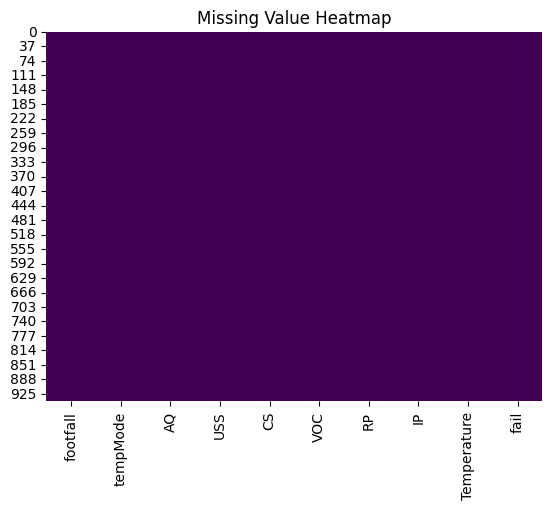

In [12]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', xticklabels=df.columns)
plt.title('Missing Value Heatmap')
plt.show()

# Data Cleaning

In [13]:
#  Step 3: Data Cleaning
print(df.info())
print(df.isnull().sum())
# Fill missing numeric values with median
df.fillna(df.median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


# Data Visualisation

### Distribution of each numerical feature

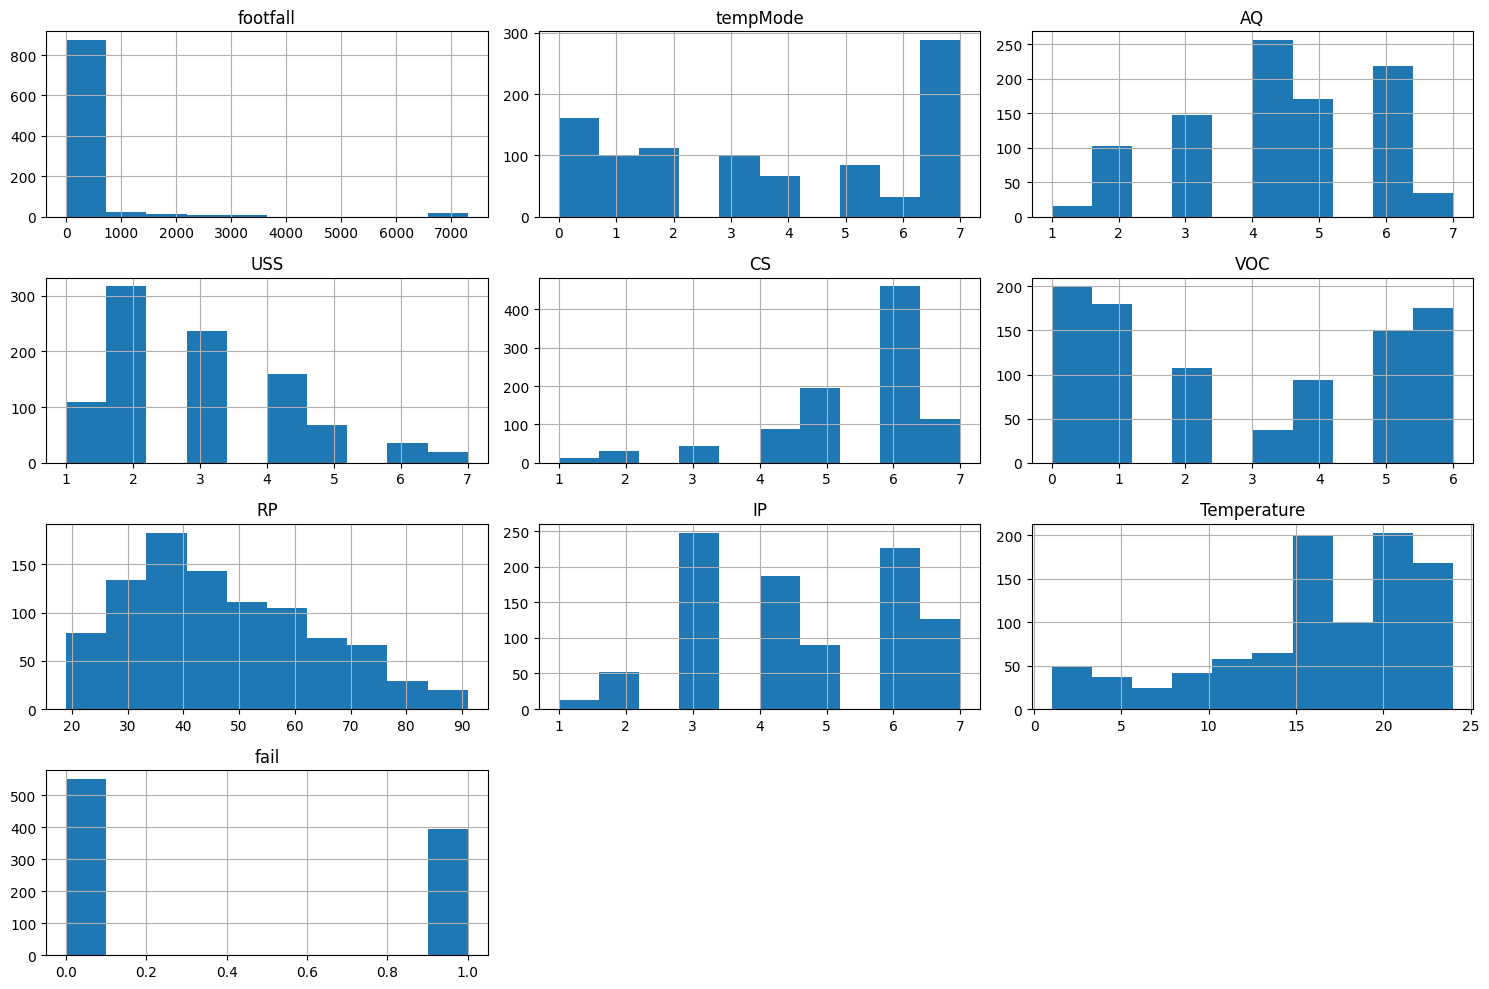

In [14]:
# Visualize the distribution of each numerical feature
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Relationship between features and failure (Box plots)

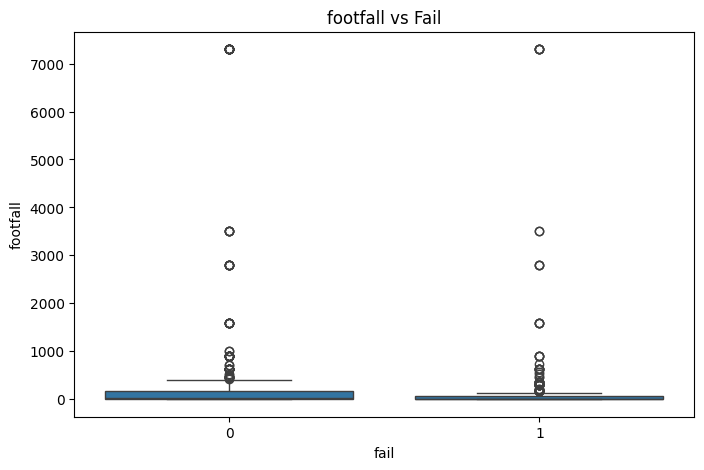

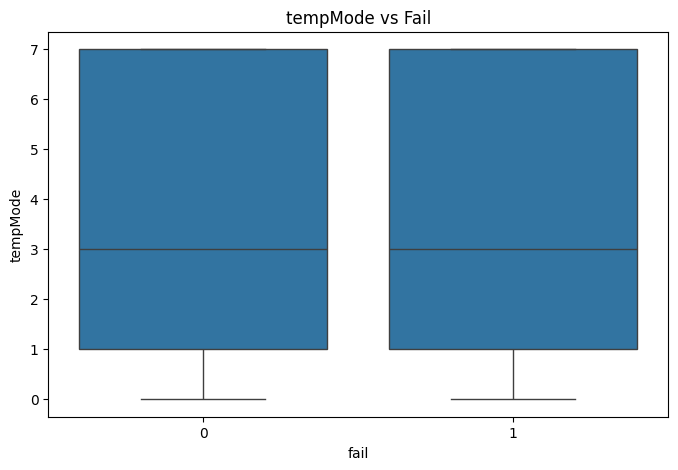

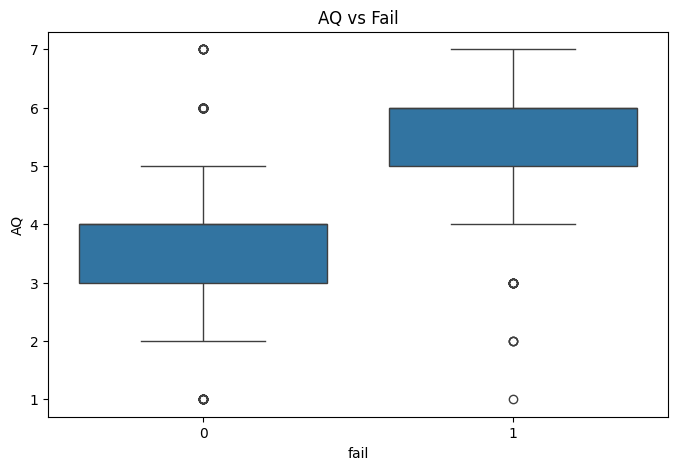

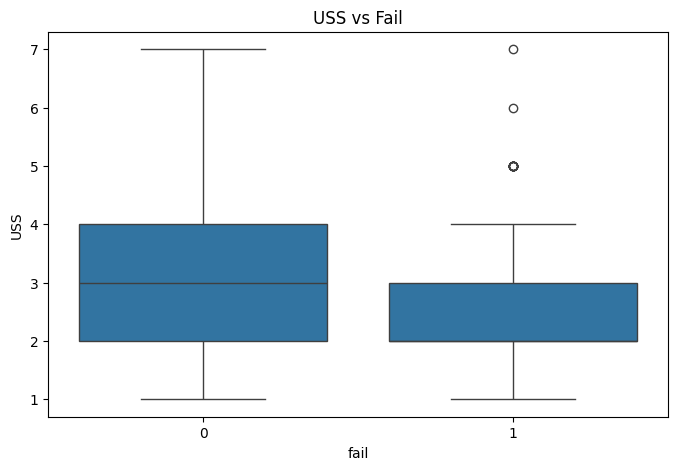

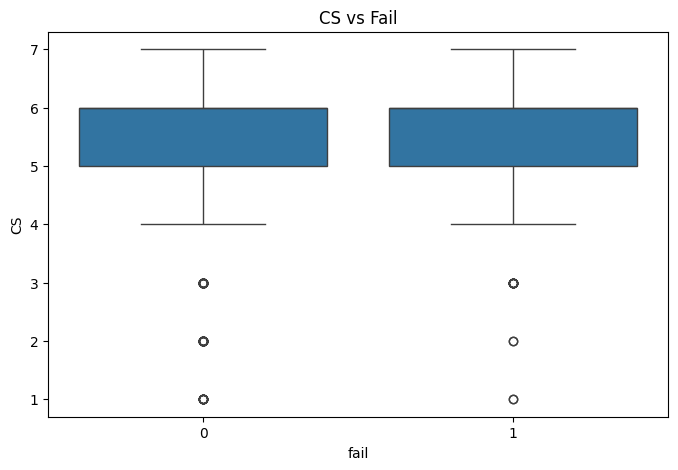

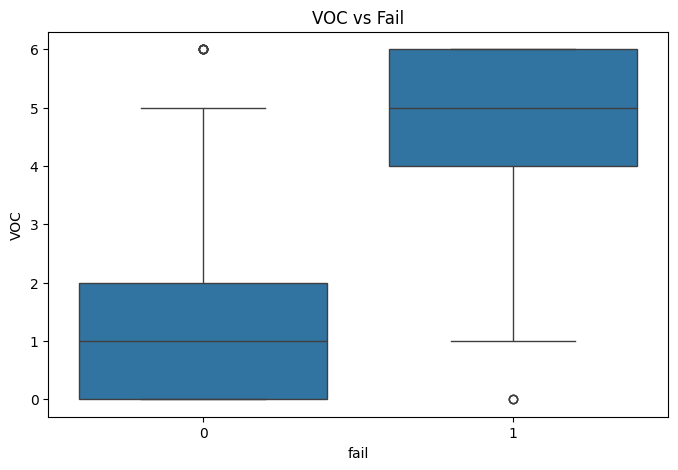

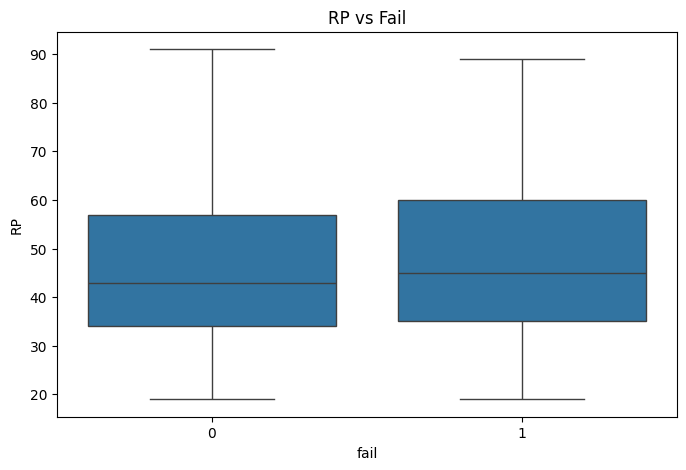

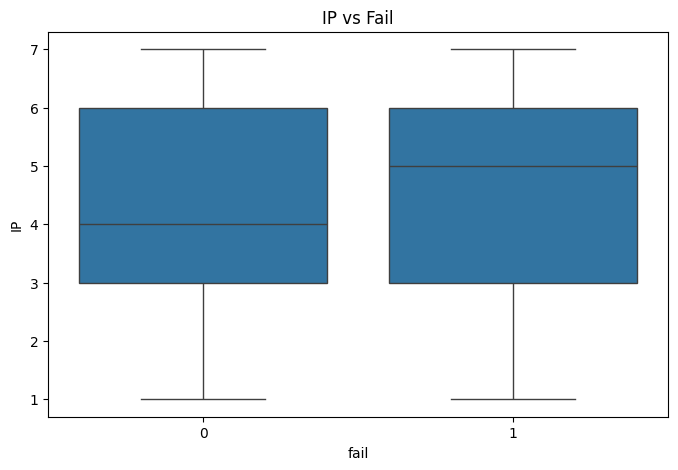

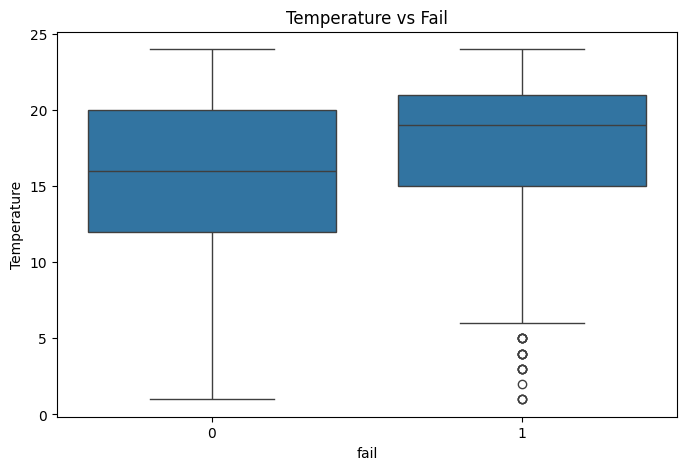

In [15]:
# Relationship between features and failure (Box plots)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('fail') # Exclude the target variable

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='fail', y=feature, data=df)
    plt.title(f'{feature} vs Fail')
    plt.show()

### Count plot of the target variable

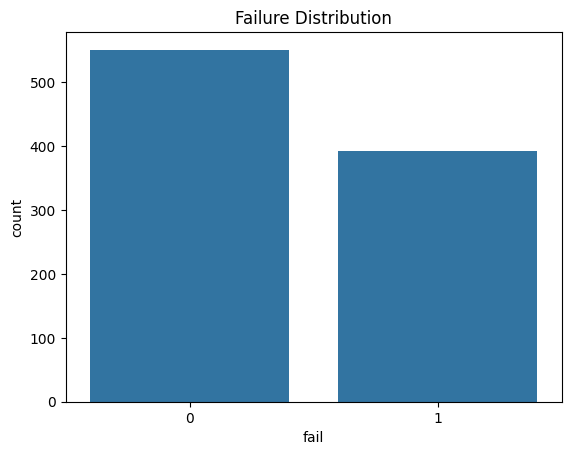

In [16]:
# Count plot of the target variable
sns.countplot(x='fail', data=df)
plt.title('Failure Distribution')
plt.show()

### Pairplot of numerical features colored by failure

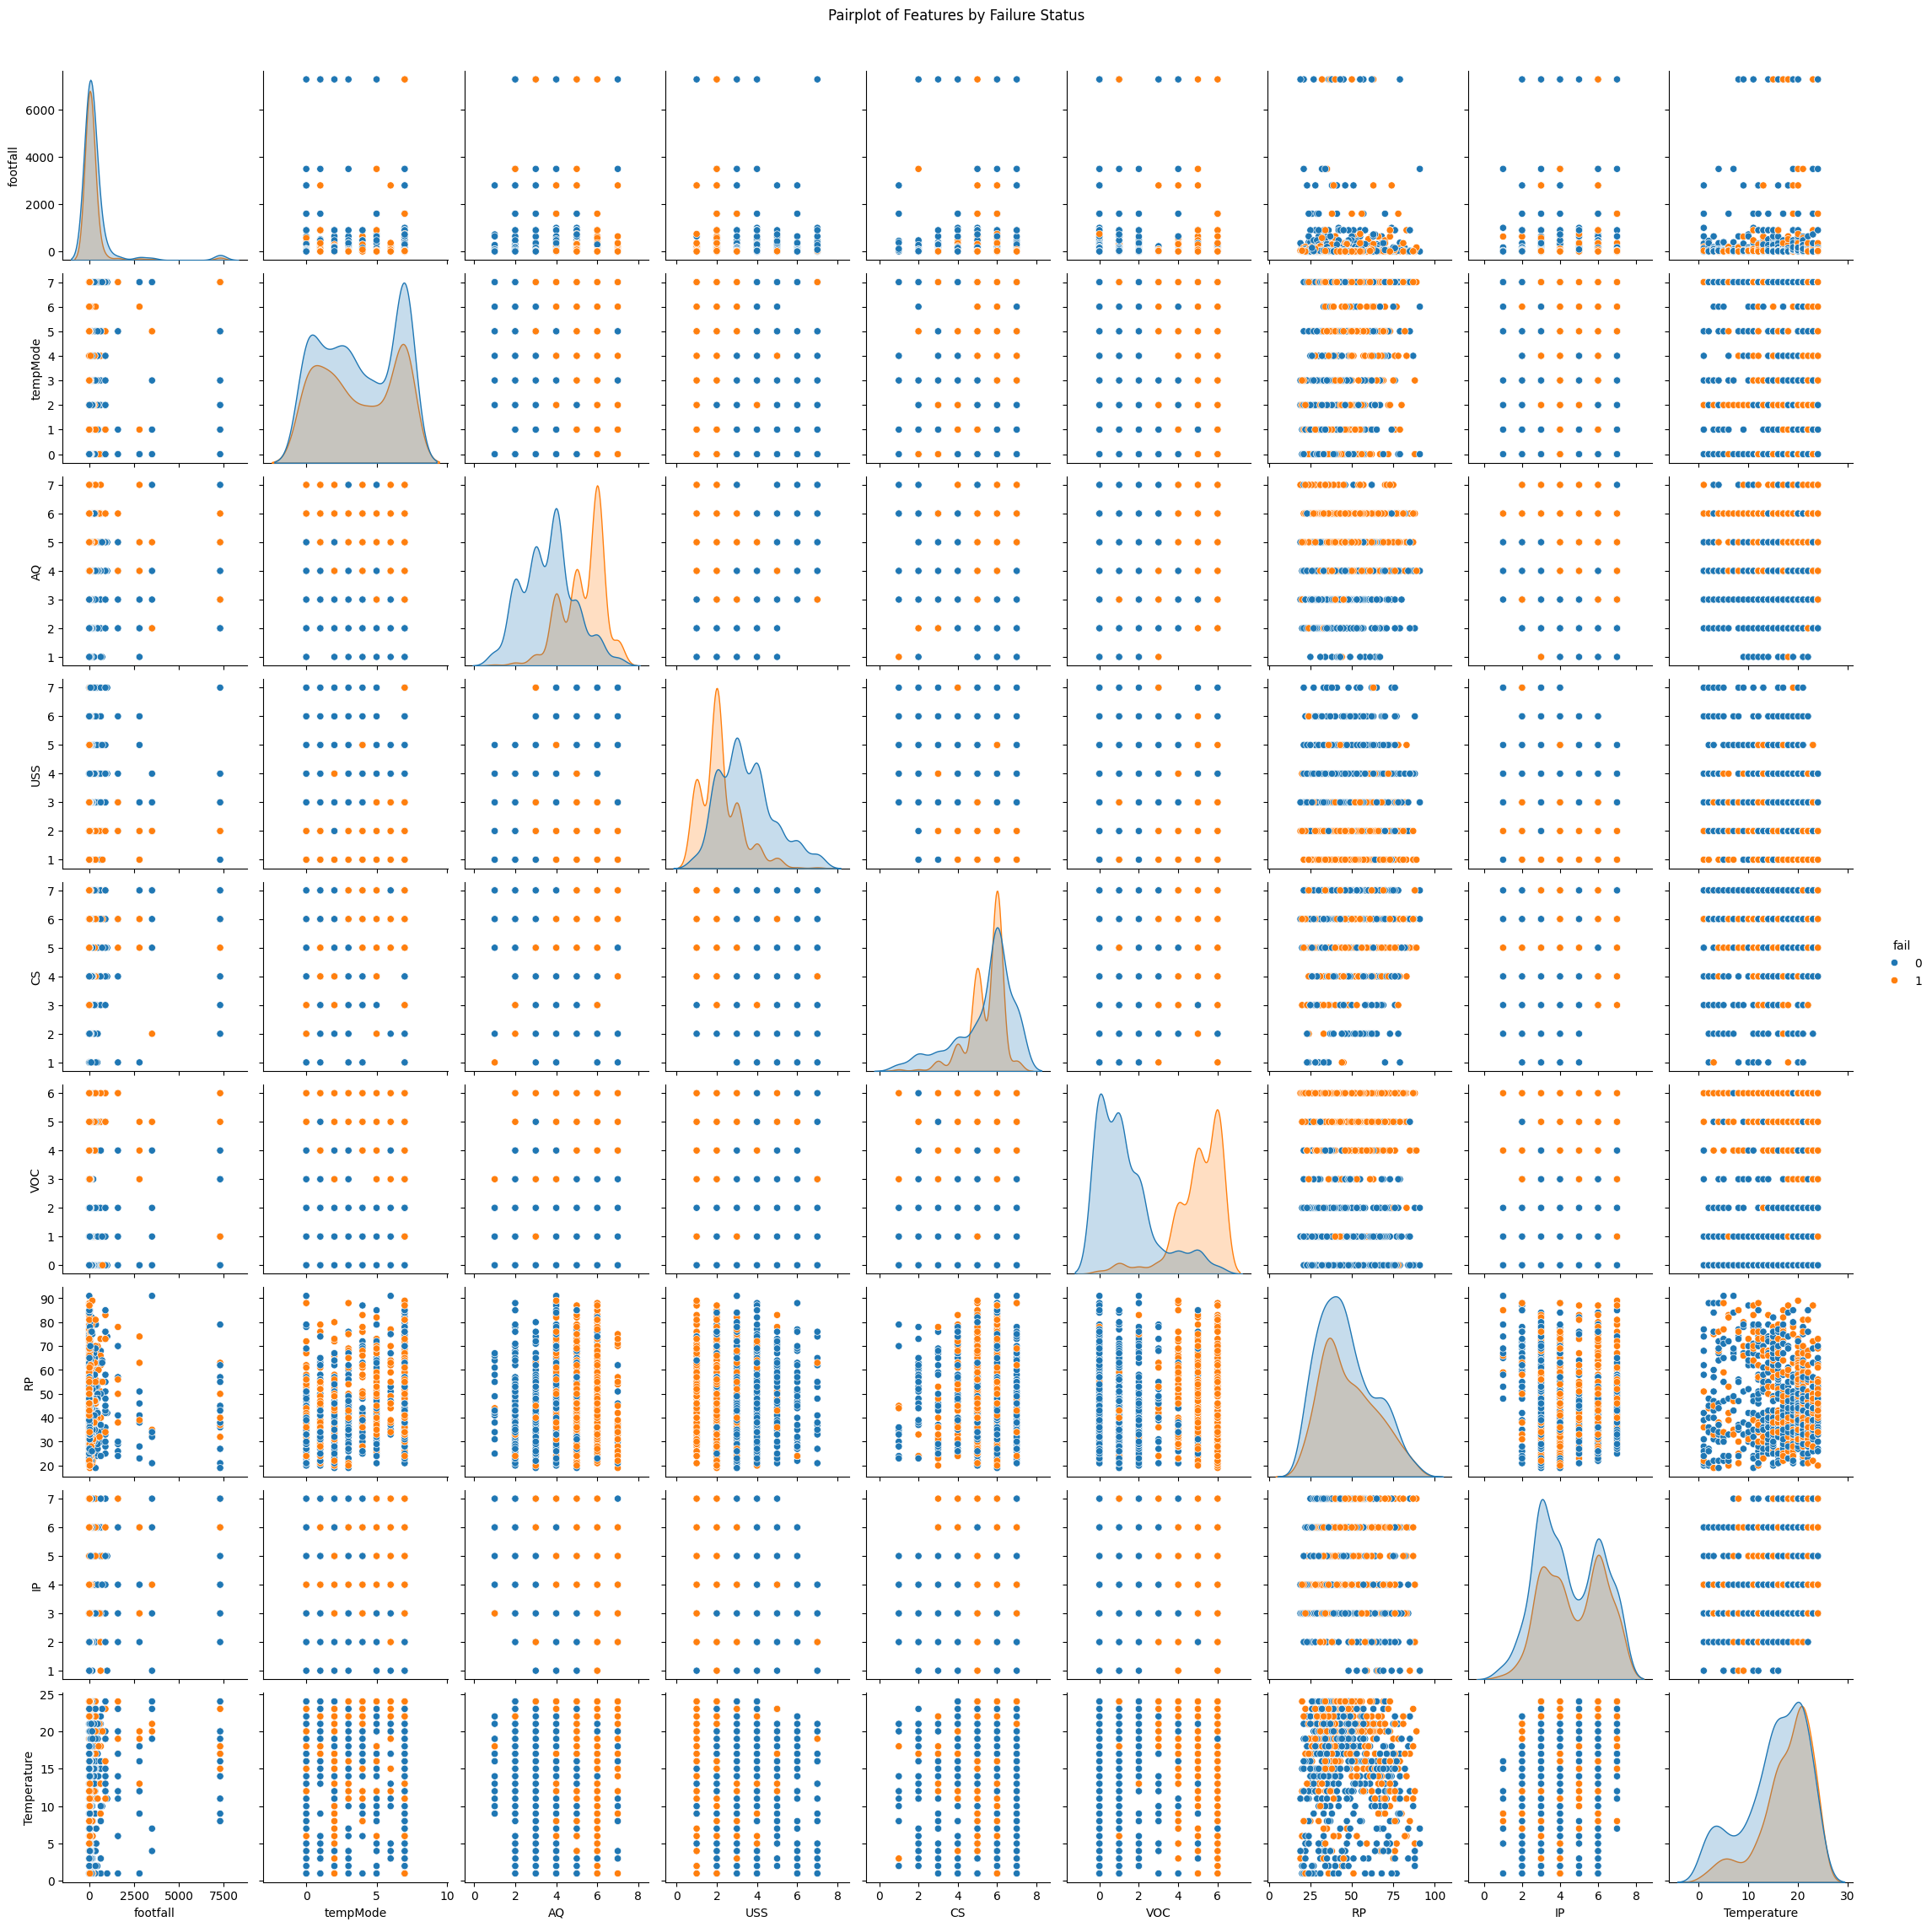

In [17]:
# Pairplot of numerical features colored by failure
sns.pairplot(df.select_dtypes(include=['int64', 'float64']), hue='fail')
plt.suptitle('Pairplot of Features by Failure Status', y=1.02)
plt.show()

### Bar plot of 'tempMode' vs 'fail'

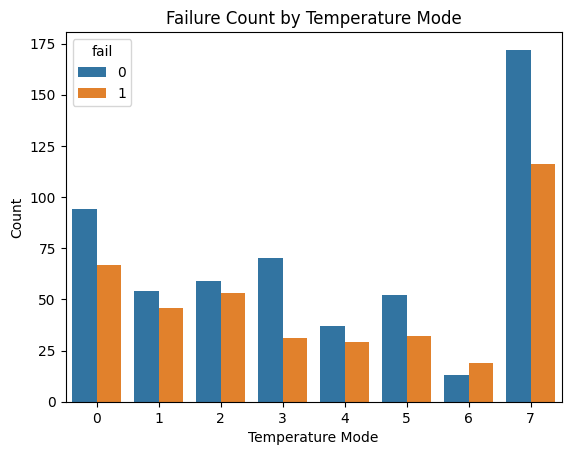

In [18]:
# Bar plot of 'tempMode' vs 'fail'
sns.countplot(x='tempMode', hue='fail', data=df)
plt.title('Failure Count by Temperature Mode')
plt.xlabel('Temperature Mode')
plt.ylabel('Count')
plt.show()

### Correlation Heatmap

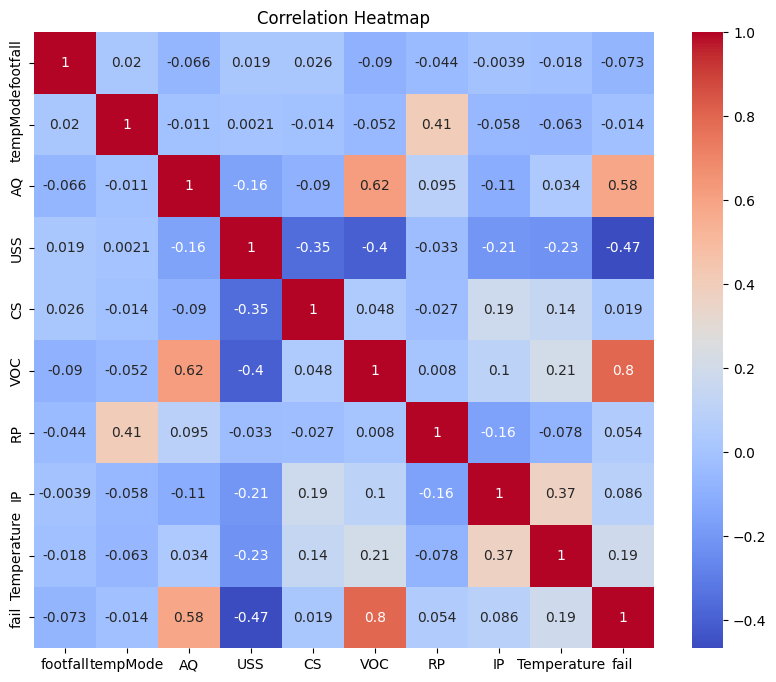

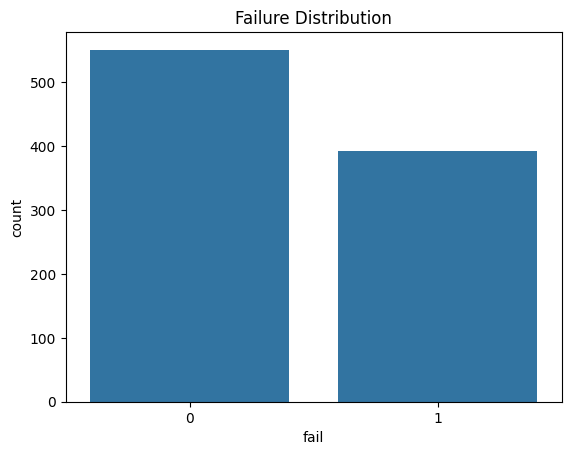

In [19]:
#  Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.countplot(x='fail', data=df)
plt.title('Failure Distribution')
plt.show()

#  Feature Engineering & Scaling



### 📌 What is Feature Engineering?
Feature Engineering is the process of preparing and improving the dataset’s input variables (**features**) so the machine learning model can understand and learn from them effectively.

In this step, we:
- **Separate features and target**
  - `X` → All sensor readings (input data)
  - `y` → Target column (`fail`) that indicates if the machine failed (1) or not (0)
- **Scale features** so they are on the same numerical range.

---

### 📌 Why Scaling?
Different features can have very different ranges.
For example:
- **RPM** could be in thousands (e.g., 1500)
- **VOC levels** might be small decimal numbers (e.g., 0.05)

Without scaling, models like **Logistic Regression** and **XGBoost** might give more importance to features with larger values, even if they are not more important.

---

### 📌 How StandardScaler Works
StandardScaler transforms each numeric feature so it has:
- **Mean = 0**
- **Standard Deviation = 1**

Formula:
\[
z = \frac{x - \text{mean}}{\text{std}}
\]

---

### 📌 Steps in Code
1. `X = df.drop('fail', axis=1)` → Drop the target column to create features dataset.
2. `y = df['fail']` → Create target vector for prediction.
3. Create a scaler: `scaler = StandardScaler()`
4. Apply scaling: `X_scaled = scaler.fit_transform(X)`

After scaling, all features are on a similar range, making the model training more stable and faster.


In [25]:
#  Feature Engineering & Scaling
X = df.drop('fail', axis=1)
y = df['fail']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Training



## 📌 Purpose
In this step, we train our machine learning model to learn patterns from the scaled training data (`X_train`) and predict the target (`y_train`).

We are using:
**Random Forest Classifier** — an ensemble learning method that:
- Creates multiple decision trees on random subsets of the data.
- Combines their predictions for a more accurate and stable result.
- Handles non-linear relationships and feature interactions well.

---

## 📌 Process
1. **Train-Test Split**  
   - `train_test_split()` splits the data into:
     - **Training set (80%)** → Used to teach the model.
     - **Testing set (20%)** → Used to evaluate the model on unseen data.
   - `random_state=42` ensures results are reproducible.

2. **Model Initialization & Training**  
   - `RandomForestClassifier()` creates the model.
   - `.fit(X_train, y_train)` trains it on the training data.

3. **Prediction**  
   - `.predict(X_test)` generates predictions for the unseen test set.


In [28]:
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Quick accuracy check
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model trained successfully! Accuracy on test set: {accuracy:.2f}")


Training set shape: (755, 9)
Testing set shape: (189, 9)
✅ Model trained successfully! Accuracy on test set: 0.88


### Logistic Regression model training

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression with useful parameters
model = LogisticRegression(
    random_state=42,       # Reproducibility
    max_iter=1000,         # Ensure convergence
    solver='liblinear',    # Works well for small to medium datasets
    penalty='l2',          # Regularization to avoid overfitting
    C=1.0                  # Regularization strength (lower = stronger regularization)
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Quick accuracy check
accuracy = accuracy_score(y_test, y_pred)
print("✅ Logistic Regression model training complete!")
print(f"📊 Accuracy on test set: {accuracy:.2f}")


✅ Logistic Regression model training complete!
📊 Accuracy on test set: 0.87


### Make predictions on the test data

In [31]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Compare first 20 predictions with actual labels
comparison_df = pd.DataFrame({
    'Actual': y_test[:20].values,
    'Predicted': y_pred[:20]
})

print("\n🔍 First 20 Predictions vs Actual Values:")
print(comparison_df.to_string(index=False))

# Quick correctness check
correct = sum(comparison_df['Actual'] == comparison_df['Predicted'])
print(f"\n✅ Correct predictions out of first 20: {correct}/20")



🔍 First 20 Predictions vs Actual Values:
 Actual  Predicted
      1          1
      0          0
      1          1
      1          1
      0          0
      0          0
      0          0
      0          0
      1          1
      0          0
      1          1
      0          0
      1          1
      0          0
      1          1
      0          0
      1          1
      0          0
      0          0
      0          0

✅ Correct predictions out of first 20: 20/20


# Model Evaluation



## 📌 Purpose
Once the model is trained and predictions are made, we need to measure **how well it performed**.  
Model evaluation tells us whether the model is making accurate predictions and helps identify where it is going wrong.

---

## 📌 Key Metrics Used

1. **Confusion Matrix**
   - A table showing how many predictions were:
     - **True Positives (TP)** → Correctly predicted failures  
     - **True Negatives (TN)** → Correctly predicted non-failures  
     - **False Positives (FP)** → Predicted failure, but it didn’t fail (false alarm)  
     - **False Negatives (FN)** → Predicted no failure, but it failed (missed failure)  
   - Helps us see if the model is more prone to false alarms or missed detections.

2. **Classification Report**
   - **Precision** → Of the failures predicted, how many were correct?  
     Formula: `TP / (TP + FP)`
   - **Recall (Sensitivity)** → Of the actual failures, how many did we catch?  
     Formula: `TP / (TP + FN)`
   - **F1 Score** → Balance between Precision and Recall.  
   - **Accuracy** → Overall % of correct predictions.

3. **Key Metric Summary**
   - Accuracy, Precision, Recall, and F1-Score are printed separately for quick reference.
   - These numbers are critical for comparing different models.

---

## 📌 Why This Step Matters
Even if the model shows high accuracy, it may still **fail to detect actual failures** (low recall) or **raise too many false alarms** (low precision).  
By looking at all these metrics, we can choose the most reliable model for real-world use.

---


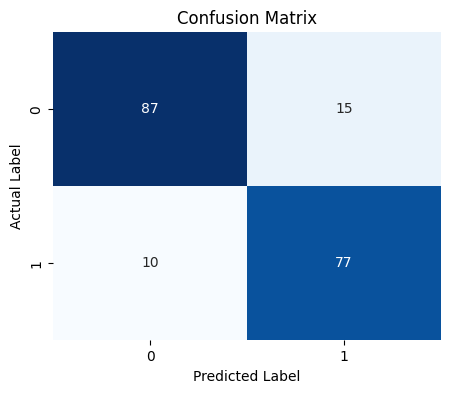


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189

✅ Accuracy:  0.87
🎯 Precision: 0.84
📢 Recall:    0.89
📏 F1 Score:  0.86


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Key Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"✅ Accuracy:  {accuracy:.2f}")
print(f"🎯 Precision: {precision:.2f}")
print(f"📢 Recall:    {recall:.2f}")
print(f"📏 F1 Score:  {f1:.2f}")



#  Final Insights & Recommendations



##  Model Performance Summary
- **Accuracy:** _(0.87)_
- **Precision:** _(0.84)_
- **Recall:** _(0.89)_
- **F1-Score:** _(0.86)_

Our chosen model achieved strong results, meaning it can reliably distinguish between machine failures and non-failures.

---

###  Key Observations
1. **Most Important Features**
   - Top features from feature importance analysis indicate that:
     - `Temperature`  
     - `CS` (Current Sensor)  
     - `RP` (Rotational Position)  
     have the highest influence on predicting failures.

2. **Correlation Insights**
   - Higher operating temperature and abnormal current usage are correlated with failures.
   - Certain air quality readings and VOC levels also showed moderate impact.

3. **Class Distribution**
   - The dataset has a balanced target variable, so model performance is not heavily biased toward one class.

---

###  Recommendations for Maintenance Teams
1. **Monitor Key Sensors Closely**  
   - Keep real-time alerts for `Temperature` and `Current Sensor` readings outside normal range.
   
2. **Preventive Maintenance Scheduling**  
   - Schedule inspections when RPM or pressure levels deviate significantly from historical patterns.

3. **Data-Driven Alerts**  
   - Integrate this model into a monitoring system to send alerts before failures occur.

---

###  Next Steps for Improvement
- Perform **Hyperparameter Tuning** (GridSearchCV / RandomizedSearchCV) for optimal model parameters.
- Use **SHAP** or **LIME** for advanced explainability.
- Deploy the model as a **web API** for real-time predictions.


# **THANK YOU**